<a href="https://colab.research.google.com/github/Kriti1211/YBI-internship/blob/main/Servo_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Servo Prediction using Linear Regression***

***Objective***

The key idea is to leverage linear regression to understand and quantify the relationship between input variables and the behavior of a servo system. This understanding can lead to improved control, maintenance, and overall performance of the system. However, it's essential to note that the actual objectives and methods may vary depending on the specific application and the complexity of the servo system. Advanced machine learning techniques beyond simple linear regression may also be employed for more accurate and complex predictions.Here are some common objectives for servo prediction using linear regression:


1.   Control System Tuning
2.   Fault Detection and Diagnosis
3.   Performance Optimization
4.   Predictive Maintenance
5.   Energy Efficiency
6.   Process Optimization




***Data Source***

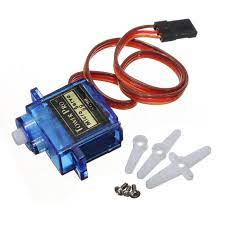

The data source for servo prediction by linear regression typically involves collecting historical data from the servo system you want to predict.
A data frame of 167 observations on 5 variables,4 nominal and 1 as the target class.This data set is from a simulation of a servo system involving a servo amplifier,a motor,a lead screw/nut,and a sliding carriage of some sort.It may have been on of the translational axes of a robot on the 9th floor of the AI lab.In any case,the output value is almost certainly a rise time,or the time required for the system to respond to a step change in a position set point.The variables that describe the data set and their values are the following:


1.   Motor A,B,C,D,E
2.   Screw A,B,C,D,E
3.   Pgain 3,4,5,6
4.   Vgain 1,2,3,4,5
5.   Class 0.13 to 7.10



***Import Library***

In [1]:
import pandas as pd

In [2]:
import numpy as np

***Import Data***

Use URL of file directory

In [3]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv")

***Describe data***

Get the first five rows of the dataframe

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Get the summary statistics

In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Get the column names

In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Get the shape of the dataframe

In [8]:
df.shape

(167, 5)

Get categories and counts of categorical variables

In [9]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

***Data Visualization***

***Data Preprocessing***

Get encoding of categorical features

In [12]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [13]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

***Define y (dependent or label or target variable) and X (independent or features or attribute variables)***

In [15]:
y=df['Class']
X=df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [16]:
y.shape

(167,)

In [17]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [18]:
X.shape

(167, 4)

In [19]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


***Train Test Split***

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2529)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

***Modelling***

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

***Model Prediction***

In [27]:
y_pred=lr.predict(X_test)

In [29]:
y_pred.shape

(51,)

In [30]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

***Model Evaluation***

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [33]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [34]:
r2_score(y_test,y_pred)

0.6807245170563927

***Data Visualization***

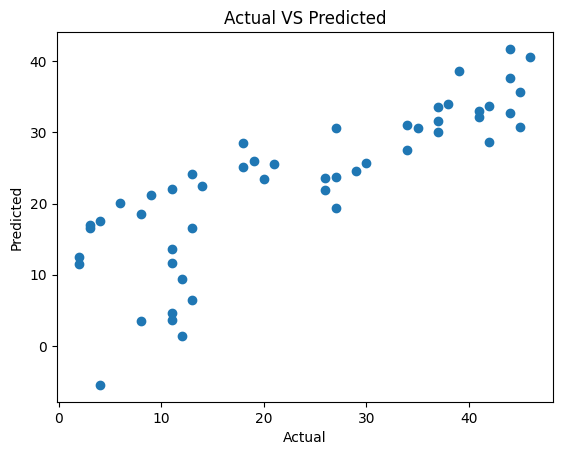

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

***Get Future predictions***

Steps to follow

1.  Extract a random row using sample function
2.  Separate X and y
3.  Standardize X
4.  Predict

In [36]:
X_new=df.sample(1)

In [37]:
X_new

,Motor,Screw,Pgain,Vgain,Class
101,0,4,3,2,44


In [38]:
X_new.shape

(1, 5)

In [39]:
X_new=X_new.drop('Class',axis=1)

In [40]:
X_new

,Motor,Screw,Pgain,Vgain
101,0,4,3,2


In [41]:
X_new.shape

(1, 4)

In [42]:
y_pred_new=lr.predict(X_new)

In [43]:
y_pred_new

array([32.7323477])

***Explaination***

Servo prediction using linear regression is a technique for forecasting a servo system's behavior based on input variables. In this approach, data is collected, comprising input factors (like control signals) and the corresponding servo system responses. Linear regression is then applied to create a predictive model that captures the linear relationship between inputs and outputs. The model aims to find coefficients that minimize the difference between predicted and actual outcomes in the training data.
The process is broken down into following steps:
1. Understanding the Problem
2. Data Collection
3. Data Preprocessing
4. Splitting Data
5. Linear Regression Modeling
6. Model Evaluation and prediction

During training, linear regression calculates these coefficients, which represent the system's response to changes in input variables. This knowledge is then used to make predictions. The model's performance is assessed using evaluation metrics like Ordinary Least Squares (OLS) or R-squared (R2).

